In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Verificação do sinal
Encontrou-se um valor destoante de ac2rad em 'vertical-misalignment/0.63mm/61.8496.csv'

In [2]:
# dados no tempo
signals = pd.read_csv('../mafaulda/vertical-misalignment/0.63mm/61.8496.csv', header=None, 
                      names=['tacômetro', 'ax1', 'rad1', 'tg1', 
                            'ax2', 'rad2', 'tg2', 'microfone'])

<AxesSubplot:>

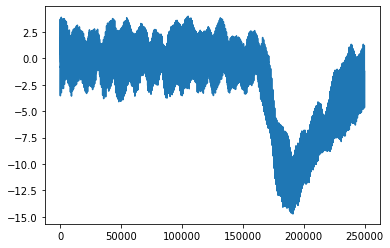

In [3]:
signals['ax2'].plot()

# Corrigindo o DataFrame
Deve ser rodado uma única vez.

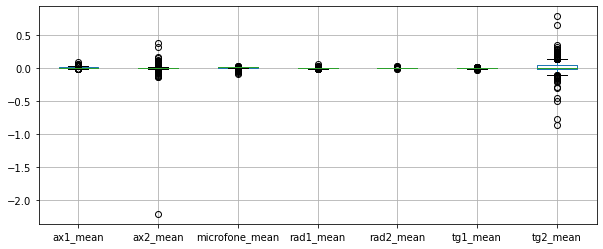

In [4]:
# abre arquivo e mostra o outlier
df = pd.read_csv('../data.csv')

medias = [col for col in list(df.columns) if 'mean' in col]
df[medias].boxplot(figsize=(10,4));

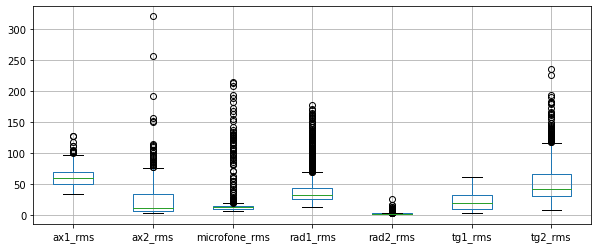

In [5]:
rms = [col for col in list(df.columns) if 'rms' in col]
df[rms].boxplot(figsize=(10,4));

In [6]:
df.loc[(df['severidade'] == 0.63) & (df['rotacao'] > 60.5), ['defeito', 'severidade', 'rotacao', 'ax2_mean', 'ax2_rms']]

,defeito,severidade,rotacao,ax2_mean,ax2_rms
296,desalinhamento_vertical,0.63,60.8256,0.011948,53.659326
297,desalinhamento_vertical,0.63,61.8496,-2.205993,320.842618


Por simplificação e por similaridade, o valor do sinal mais próximo (rot_vel=60.825) será copiado

In [7]:
# substitui valor
df.at[297,'ax2_mean'] = df.at[296,'ax2_mean']
df.at[297,'ax2_rms']  = df.at[296,'ax2_rms'] 

In [8]:
df.loc[(df['severidade'] == 0.63) & (df['rotacao'] > 60.5), ['defeito', 'severidade','rotacao', 'ax2_mean', 'ax2_rms']]

,defeito,severidade,rotacao,ax2_mean,ax2_rms
296,desalinhamento_vertical,0.63,60.8256,0.011948,53.659326
297,desalinhamento_vertical,0.63,61.8496,0.011948,53.659326


In [9]:
# salva mudança no arquivo
f = open("../data.csv", "w")
df.to_csv(f, line_terminator='\n', index=False)
f.close()

## Checagem final

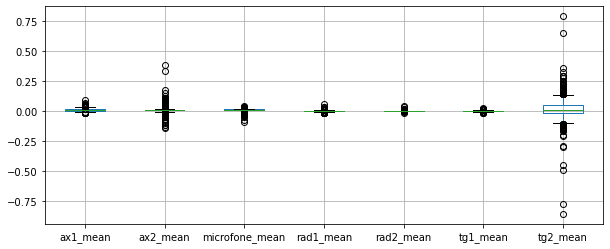

In [10]:
# abre novamente arquivo em nova variável
df_NEW = pd.read_csv('../data.csv')

df_NEW[medias].boxplot(figsize=(10,4));